# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

01:37:11 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=211759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=548877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=51758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=639208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=337863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=971059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

01:37:13 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=591980;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=325090;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

01:37:14 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=563818;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=394178;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

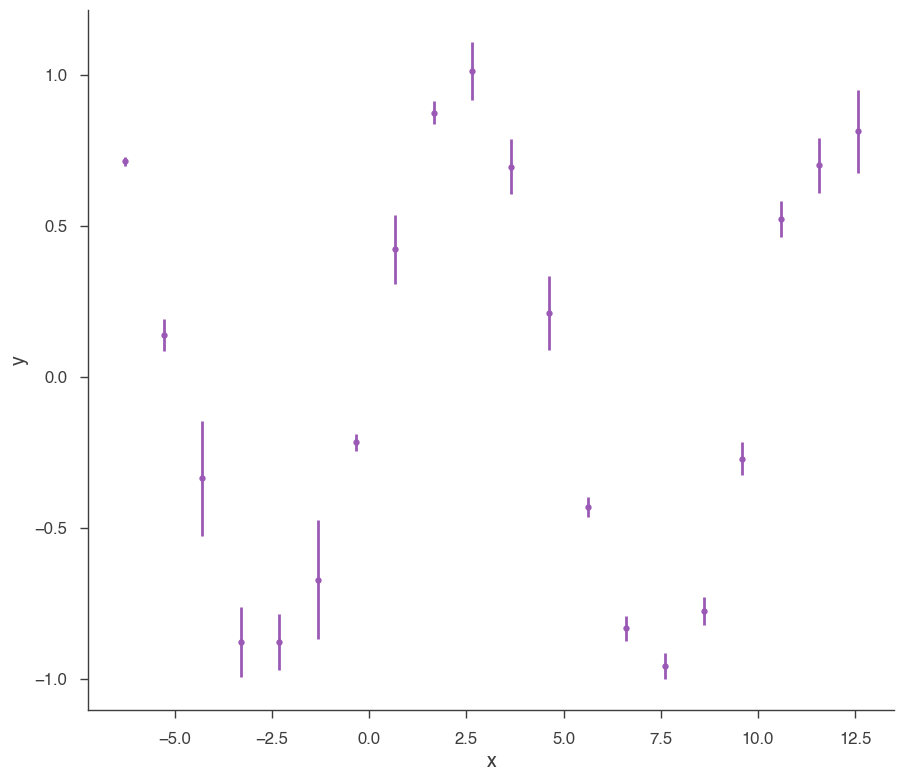

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=441097;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=659383;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

01:37:17 INFO      Mean acceptance fraction: 0.7178000000000001                                ]8;id=138060;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=592912;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

01:37:18 INFO      fit restored to maximum of posterior                                         ]8;id=714572;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=887540;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=634986;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=533690;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.17 +0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.161255
total,-8.161255


Values of statistical measures:

,statistical measures
AIC,21.028393
BIC,22.313975
DIC,20.220118
PDIC,1.948765


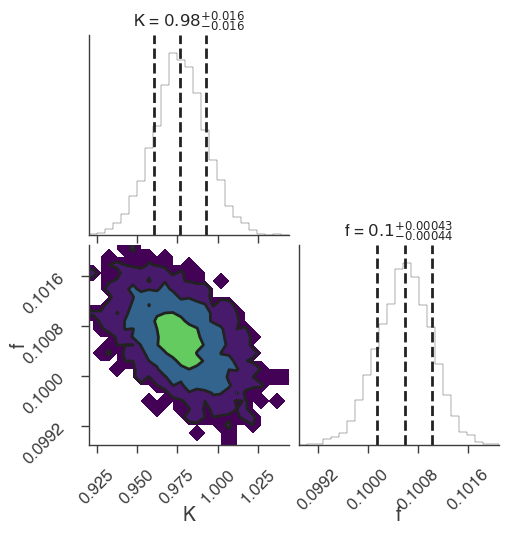

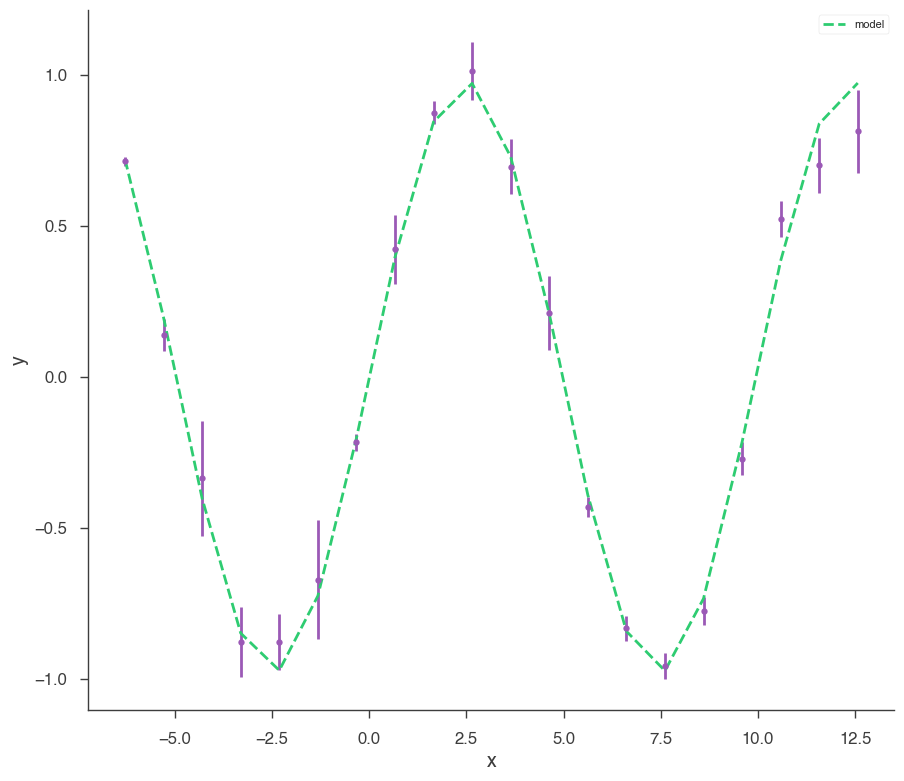

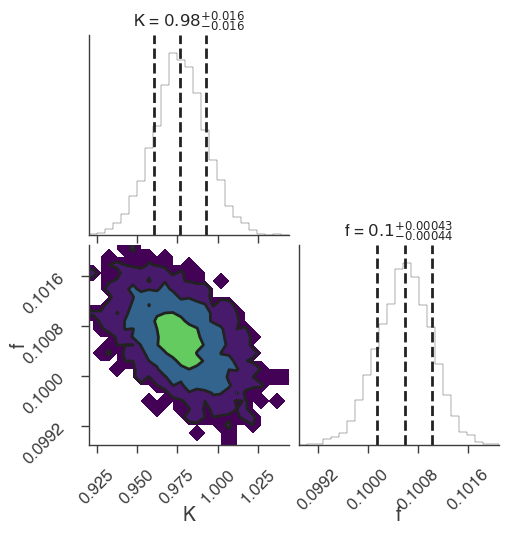

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

01:37:19 INFO      sampler set to multinest                                                ]8;id=853829;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=117546;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************



 MultiNest Warning!
 Parameter            1  of mode            3  is converging towards the edge of the prior.
 Parameter            1  of mode            6  is converging towards the edge of the prior.


  analysing data from chains/fit-.txt ln(ev)=  -17.710578931828767      +/-  0.14598673931528405     
 Total Likelihood Evaluations:         5917
 Sampling finished. Exiting MultiNest



01:37:20 INFO      fit restored to maximum of posterior                                         ]8;id=121228;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=114700;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=894552;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=102475;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.16 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.162205
total,-8.162205


Values of statistical measures:

,statistical measures
AIC,21.030292
BIC,22.315874
DIC,20.227884
PDIC,1.952159
log(Z),-7.691607


         INFO      deleting the chain directory chains                                     ]8;id=782351;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=186030;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

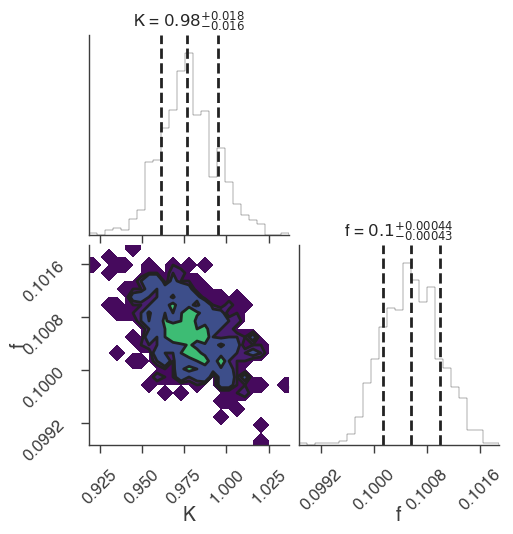

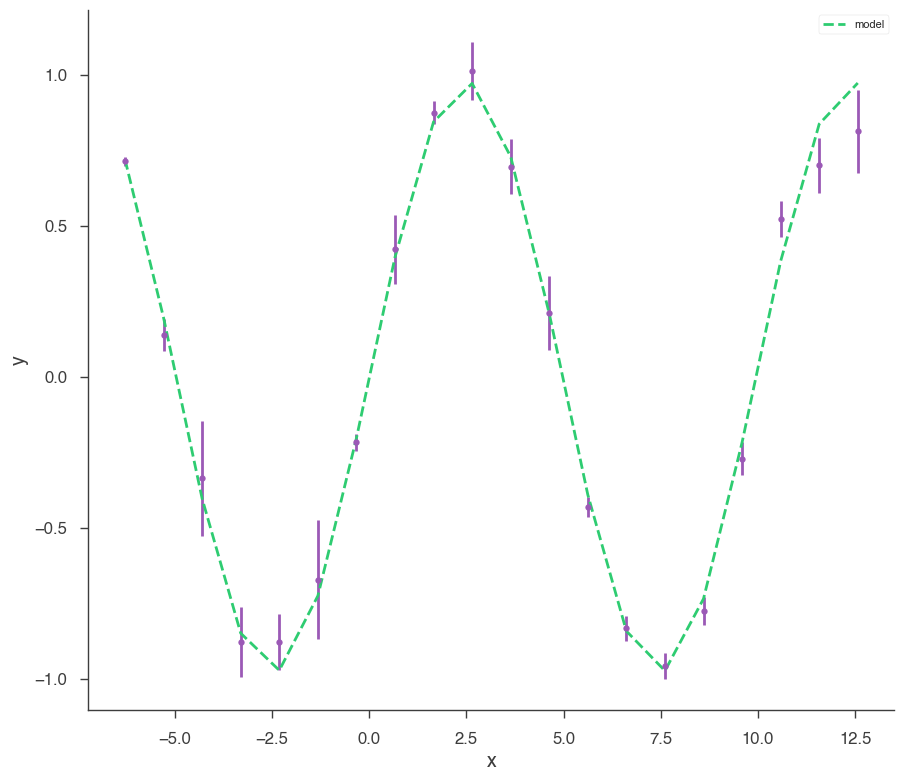

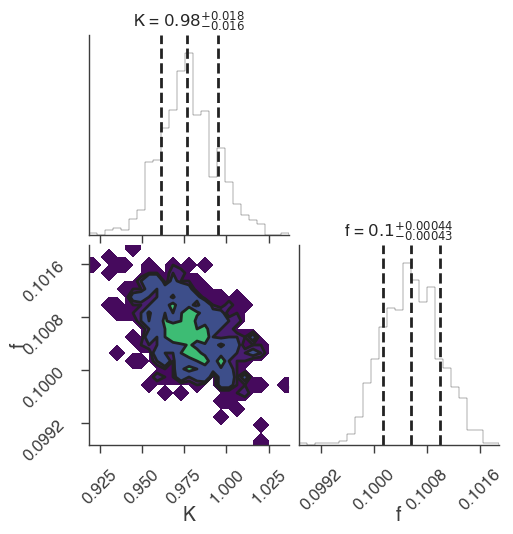

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=556524;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=554224;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

240it [00:00, 2389.56it/s, bound: 0 | nc: 2 | ncall: 727 | eff(%): 33.012 | loglstar:   -inf < -3852.298 <    inf | logz: -3859.364 +/-  0.129 | dlogz: 3819.395 >  0.409]

479it [00:00, 1766.31it/s, bound: 0 | nc: 10 | ncall: 1305 | eff(%): 36.705 | loglstar:   -inf < -2485.620 <    inf | logz: -2493.501 +/-  0.140 | dlogz: 2470.684 >  0.409]

666it [00:00, 1323.39it/s, bound: 0 | nc: 1 | ncall: 2107 | eff(%): 31.609 | loglstar:   -inf < -2000.337 <    inf | logz: -2008.041 +/-  0.133 | dlogz: 1986.922 >  0.409] 

811it [00:00, 1048.65it/s, bound: 0 | nc: 5 | ncall: 3173 | eff(%): 25.559 | loglstar:   -inf < -1619.845 <    inf | logz: -1628.297 +/-  0.141 | dlogz: 1618.185 >  0.409]

927it [00:00, 850.59it/s, bound: 0 | nc: 5 | ncall: 4313 | eff(%): 21.493 | loglstar:   -inf < -1414.292 <    inf | logz: -1422.214 +/-  0.138 | dlogz: 1410.958 >  0.409] 

1021it [00:01, 781.14it/s, bound: 0 | nc: 29 | ncall: 5619 | eff(%): 18.170 | loglstar:   -inf < -1013.990 <    inf | logz: -1023.208 +/-  0.151 | dlogz: 1015.185 >  0.409]

1104it [00:01, 686.04it/s, bound: 0 | nc: 4 | ncall: 6885 | eff(%): 16.035 | loglstar:   -inf < -732.946 <    inf | logz: -741.189 +/-  0.138 | dlogz: 730.332 >  0.409]    

1176it [00:01, 593.58it/s, bound: 0 | nc: 32 | ncall: 8436 | eff(%): 13.940 | loglstar:   -inf < -594.619 <    inf | logz: -604.148 +/-  0.151 | dlogz: 595.124 >  0.409]

1238it [00:01, 506.72it/s, bound: 0 | nc: 1 | ncall: 9676 | eff(%): 12.795 | loglstar:   -inf < -505.931 <    inf | logz: -514.562 +/-  0.143 | dlogz: 503.599 >  0.409] 

1291it [00:01, 420.06it/s, bound: 0 | nc: 6 | ncall: 11003 | eff(%): 11.733 | loglstar:   -inf < -443.411 <    inf | logz: -452.388 +/-  0.143 | dlogz: 441.191 >  0.409]

1336it [00:01, 353.68it/s, bound: 0 | nc: 116 | ncall: 12299 | eff(%): 10.863 | loglstar:   -inf < -400.939 <    inf | logz: -410.076 +/-  0.141 | dlogz: 398.742 >  0.409]

1374it [00:02, 314.97it/s, bound: 0 | nc: 40 | ncall: 13552 | eff(%): 10.139 | loglstar:   -inf < -373.203 <    inf | logz: -381.833 +/-  0.136 | dlogz: 370.030 >  0.409] 

1407it [00:02, 282.33it/s, bound: 1 | nc: 2 | ncall: 13929 | eff(%): 10.101 | loglstar:   -inf < -345.868 <    inf | logz: -355.117 +/-  0.142 | dlogz: 343.517 >  0.409] 

1567it [00:02, 534.37it/s, bound: 1 | nc: 3 | ncall: 14244 | eff(%): 11.001 | loglstar:   -inf < -231.295 <    inf | logz: -239.830 +/-  0.142 | dlogz: 227.480 >  0.409]

1668it [00:02, 530.81it/s, bound: 2 | nc: 1 | ncall: 14498 | eff(%): 11.505 | loglstar:   -inf < -183.059 <    inf | logz: -192.558 +/-  0.145 | dlogz: 180.280 >  0.409]

1876it [00:02, 845.68it/s, bound: 2 | nc: 3 | ncall: 14793 | eff(%): 12.682 | loglstar:   -inf < -110.725 <    inf | logz: -120.101 +/-  0.146 | dlogz: 107.343 >  0.409]

2006it [00:02, 759.48it/s, bound: 3 | nc: 1 | ncall: 15098 | eff(%): 13.287 | loglstar:   -inf < -82.626 <    inf | logz: -91.751 +/-  0.144 | dlogz: 78.696 >  0.409]   

2223it [00:03, 1048.09it/s, bound: 3 | nc: 1 | ncall: 15400 | eff(%): 14.435 | loglstar:   -inf < -51.530 <    inf | logz: -60.694 +/-  0.145 | dlogz: 47.033 >  0.409]

2354it [00:03, 930.70it/s, bound: 4 | nc: 1 | ncall: 15708 | eff(%): 14.986 | loglstar:   -inf < -40.102 <    inf | logz: -49.520 +/-  0.145 | dlogz: 35.525 >  0.409] 

2553it [00:03, 1156.03it/s, bound: 4 | nc: 4 | ncall: 16013 | eff(%): 15.943 | loglstar:   -inf < -26.706 <    inf | logz: -36.039 +/-  0.145 | dlogz: 21.523 >  0.409]

2692it [00:03, 956.54it/s, bound: 5 | nc: 1 | ncall: 16314 | eff(%): 16.501 | loglstar:   -inf < -21.368 <    inf | logz: -30.698 +/-  0.145 | dlogz: 15.822 >  0.409] 

2919it [00:03, 1230.69it/s, bound: 5 | nc: 1 | ncall: 16662 | eff(%): 17.519 | loglstar:   -inf < -15.334 <    inf | logz: -24.734 +/-  0.144 | dlogz:  9.277 >  0.409]

3069it [00:03, 1036.66it/s, bound: 6 | nc: 1 | ncall: 16948 | eff(%): 18.108 | loglstar:   -inf < -13.078 <    inf | logz: -22.378 +/-  0.144 | dlogz:  6.540 >  0.409]

3281it [00:03, 1261.69it/s, bound: 6 | nc: 3 | ncall: 17289 | eff(%): 18.977 | loglstar:   -inf < -10.998 <    inf | logz: -20.292 +/-  0.144 | dlogz:  3.938 >  0.409]

3433it [00:04, 1076.93it/s, bound: 7 | nc: 1 | ncall: 17561 | eff(%): 19.549 | loglstar:   -inf < -9.982 <    inf | logz: -19.305 +/-  0.144 | dlogz:  2.625 >  0.409] 

3645it [00:04, 1291.73it/s, bound: 7 | nc: 10 | ncall: 17912 | eff(%): 20.349 | loglstar:   -inf < -9.261 <    inf | logz: -18.489 +/-  0.144 | dlogz:  1.466 >  0.409]

3798it [00:04, 1158.29it/s, bound: 8 | nc: 1 | ncall: 18186 | eff(%): 20.884 | loglstar:   -inf < -8.912 <    inf | logz: -18.128 +/-  0.144 | dlogz:  0.950 >  0.409] 

4003it [00:04, 1355.23it/s, bound: 8 | nc: 2 | ncall: 18543 | eff(%): 21.588 | loglstar:   -inf < -8.610 <    inf | logz: -17.822 +/-  0.144 | dlogz:  0.531 >  0.409]

4095it [00:04, 868.55it/s, +400 | bound: 9 | nc: 1 | ncall: 19133 | eff(%): 23.995 | loglstar:   -inf < -8.186 <    inf | logz: -17.372 +/-  0.143 | dlogz:  0.001 >  0.409]

01:37:25 INFO      fit restored to maximum of posterior                                         ]8;id=805918;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=595340;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=498810;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=87004;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.19 +0.15) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.163108
total,-8.163108


Values of statistical measures:

,statistical measures
AIC,21.032098
BIC,22.317680
DIC,20.134964
PDIC,1.904986
log(Z),-7.544472


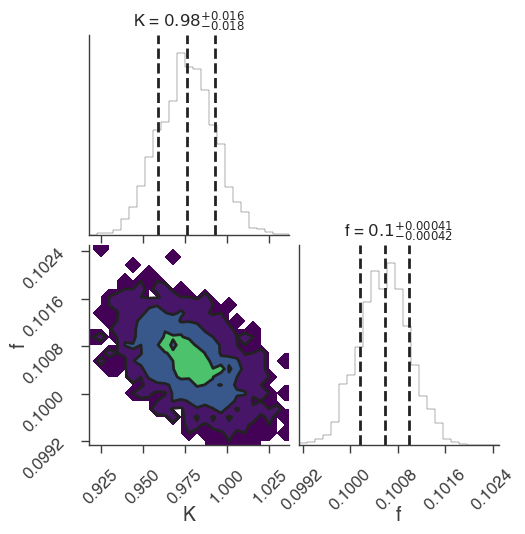

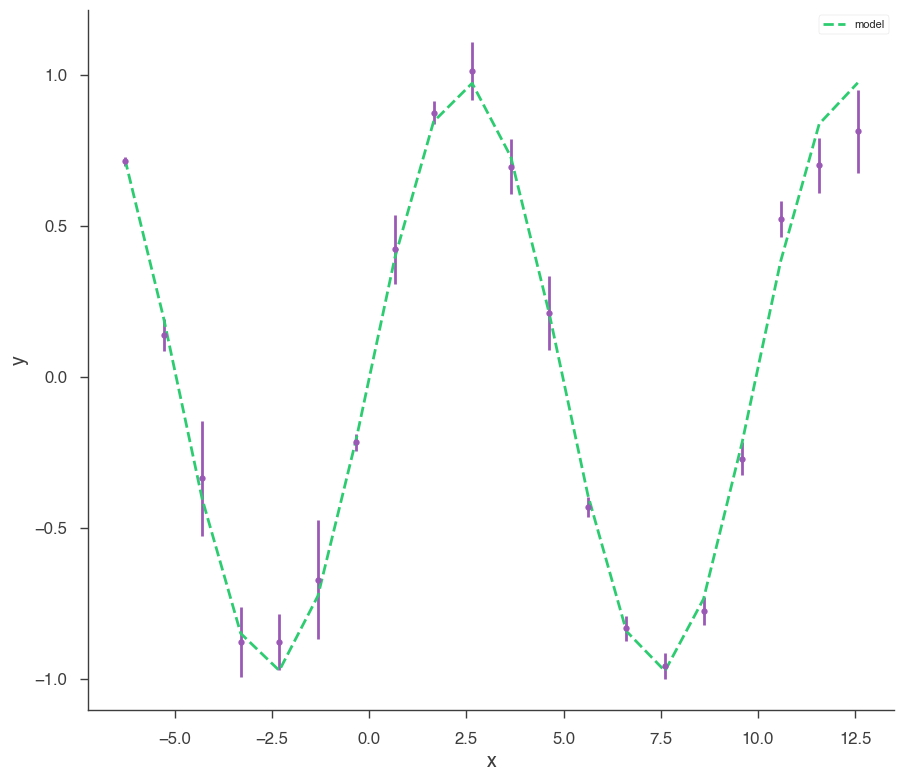

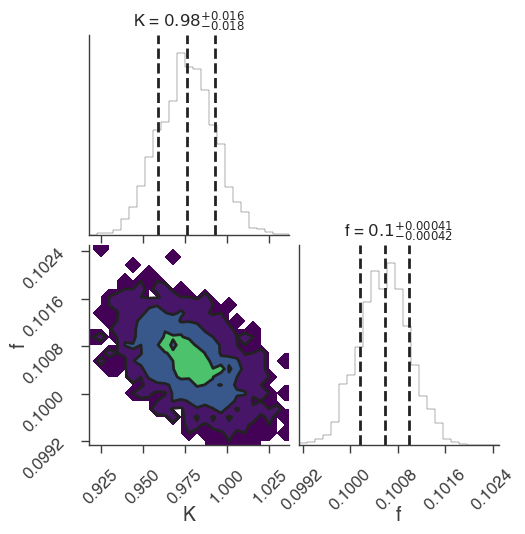

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

01:37:26 INFO      sampler set to dynesty_dynamic                                          ]8;id=14055;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=123237;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

85it [00:00, 847.03it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 92 | eff(%): 14.358 | loglstar:   -inf < -6882.201 <    inf | logz: -6889.278 +/-  0.119 | dlogz: 6922.111 >  0.010]

274it [00:00, 1459.23it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 363 | eff(%): 31.750 | loglstar:   -inf < -4230.356 <    inf | logz: -4237.811 +/-  0.122 | dlogz: 4215.622 >  0.010]

426it [00:00, 1484.35it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 676 | eff(%): 36.224 | loglstar:   -inf < -3214.839 <    inf | logz: -3222.186 +/-  0.117 | dlogz: 3193.253 >  0.010]

575it [00:00, 1403.03it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1094 | eff(%): 36.073 | loglstar:   -inf < -2625.493 <    inf | logz: -2633.469 +/-  0.124 | dlogz: 2605.421 >  0.010]

716it [00:00, 1213.32it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1650 | eff(%): 33.302 | loglstar:   -inf < -2288.278 <    inf | logz: -2296.387 +/-  0.123 | dlogz: 2278.385 >  0.010]

842it [00:00, 1111.36it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2217 | eff(%): 30.990 | loglstar:   -inf < -2043.718 <    inf | logz: -2051.066 +/-  0.117 | dlogz: 2033.769 >  0.010]

957it [00:00, 899.11it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3048 | eff(%): 26.973 | loglstar:   -inf < -1829.958 <    inf | logz: -1838.449 +/-  0.125 | dlogz: 1828.228 >  0.010] 

1054it [00:01, 776.01it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3850 | eff(%): 24.230 | loglstar:   -inf < -1659.331 <    inf | logz: -1667.720 +/-  0.125 | dlogz: 1657.027 >  0.010]

1138it [00:01, 716.06it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4587 | eff(%): 22.371 | loglstar:   -inf < -1537.614 <    inf | logz: -1546.448 +/-  0.129 | dlogz: 1536.747 >  0.010]

1214it [00:01, 618.95it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 5446 | eff(%): 20.417 | loglstar:   -inf < -1343.287 <    inf | logz: -1352.416 +/-  0.132 | dlogz: 1343.080 >  0.010]

1280it [00:01, 565.78it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 6254 | eff(%): 18.952 | loglstar:   -inf < -1059.246 <    inf | logz: -1068.706 +/-  0.137 | dlogz: 1062.884 >  0.010]

1339it [00:01, 541.43it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 6885 | eff(%): 18.131 | loglstar:   -inf < -913.969 <    inf | logz: -923.499 +/-  0.136 | dlogz: 915.688 >  0.010]  

1395it [00:01, 487.13it/s, batch: 0 | bound: 0 | nc: 45 | ncall: 7726 | eff(%): 16.958 | loglstar:   -inf < -784.569 <    inf | logz: -792.991 +/-  0.128 | dlogz: 782.564 >  0.010]

1445it [00:01, 444.84it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 8482 | eff(%): 16.088 | loglstar:   -inf < -692.900 <    inf | logz: -701.969 +/-  0.130 | dlogz: 691.815 >  0.010]

1491it [00:02, 394.14it/s, batch: 0 | bound: 0 | nc: 72 | ncall: 9408 | eff(%): 15.048 | loglstar:   -inf < -623.218 <    inf | logz: -632.786 +/-  0.134 | dlogz: 623.238 >  0.010]

1532it [00:02, 379.84it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 10059 | eff(%): 14.509 | loglstar:   -inf < -561.203 <    inf | logz: -569.512 +/-  0.124 | dlogz: 558.478 >  0.010]

1571it [00:02, 352.99it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 11002 | eff(%): 13.658 | loglstar:   -inf < -514.525 <    inf | logz: -523.115 +/-  0.127 | dlogz: 512.101 >  0.010]

1607it [00:02, 348.65it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 11793 | eff(%): 13.072 | loglstar:   -inf < -476.106 <    inf | logz: -485.332 +/-  0.128 | dlogz: 474.619 >  0.010]

1642it [00:02, 318.17it/s, batch: 0 | bound: 0 | nc: 82 | ncall: 12605 | eff(%): 12.530 | loglstar:   -inf < -440.018 <    inf | logz: -449.908 +/-  0.136 | dlogz: 440.363 >  0.010]

1674it [00:02, 288.02it/s, batch: 0 | bound: 0 | nc: 63 | ncall: 13625 | eff(%): 11.851 | loglstar:   -inf < -415.841 <    inf | logz: -424.427 +/-  0.126 | dlogz: 413.262 >  0.010]

1704it [00:02, 263.90it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 14568 | eff(%): 11.309 | loglstar:   -inf < -397.924 <    inf | logz: -406.491 +/-  0.124 | dlogz: 395.263 >  0.010] 

1731it [00:03, 259.98it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 15363 | eff(%): 10.912 | loglstar:   -inf < -377.932 <    inf | logz: -386.388 +/-  0.128 | dlogz: 375.078 >  0.010]

1758it [00:03, 248.70it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 16023 | eff(%): 10.640 | loglstar:   -inf < -364.304 <    inf | logz: -372.890 +/-  0.125 | dlogz: 361.555 >  0.010] 

1783it [00:03, 239.34it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 16613 | eff(%): 10.419 | loglstar:   -inf < -351.959 <    inf | logz: -360.618 +/-  0.126 | dlogz: 349.197 >  0.010]

1807it [00:03, 220.18it/s, batch: 0 | bound: 0 | nc: 93 | ncall: 17438 | eff(%): 10.074 | loglstar:   -inf < -337.630 <    inf | logz: -346.420 +/-  0.127 | dlogz: 334.972 >  0.010]

1830it [00:03, 177.75it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17626 | eff(%): 10.096 | loglstar:   -inf < -324.020 <    inf | logz: -332.874 +/-  0.128 | dlogz: 321.404 >  0.010] 

1996it [00:03, 508.34it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17873 | eff(%): 10.864 | loglstar:   -inf < -231.760 <    inf | logz: -240.769 +/-  0.128 | dlogz: 228.930 >  0.010]

2132it [00:03, 713.43it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18180 | eff(%): 11.413 | loglstar:   -inf < -188.573 <    inf | logz: -197.242 +/-  0.126 | dlogz: 184.956 >  0.010]

2217it [00:03, 582.58it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18377 | eff(%): 11.744 | loglstar:   -inf < -159.769 <    inf | logz: -168.944 +/-  0.131 | dlogz: 156.566 >  0.010]

2414it [00:04, 890.37it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18624 | eff(%): 12.623 | loglstar:   -inf < -117.958 <    inf | logz: -127.103 +/-  0.128 | dlogz: 114.226 >  0.010]

2576it [00:04, 1065.74it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18914 | eff(%): 13.269 | loglstar:   -inf < -86.138 <    inf | logz: -95.707 +/-  0.132 | dlogz: 82.524 >  0.010]  

2701it [00:04, 877.66it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19151 | eff(%): 13.745 | loglstar:   -inf < -67.983 <    inf | logz: -77.086 +/-  0.129 | dlogz: 63.570 >  0.010] 

2897it [00:04, 1118.67it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19420 | eff(%): 14.543 | loglstar:   -inf < -50.249 <    inf | logz: -59.595 +/-  0.130 | dlogz: 45.678 >  0.010]

3097it [00:04, 1330.58it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19831 | eff(%): 15.233 | loglstar:   -inf < -36.573 <    inf | logz: -46.062 +/-  0.131 | dlogz: 31.729 >  0.010]

3250it [00:04, 1057.72it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20039 | eff(%): 15.824 | loglstar:   -inf < -28.370 <    inf | logz: -38.133 +/-  0.132 | dlogz: 23.489 >  0.010]

3423it [00:04, 1205.02it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20358 | eff(%): 16.411 | loglstar:   -inf < -22.472 <    inf | logz: -32.157 +/-  0.130 | dlogz: 17.153 >  0.010]

3565it [00:05, 920.29it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20646 | eff(%): 16.859 | loglstar:   -inf < -18.479 <    inf | logz: -28.243 +/-  0.132 | dlogz: 12.949 >  0.010] 

3761it [00:05, 1126.29it/s, batch: 0 | bound: 5 | nc: 5 | ncall: 20942 | eff(%): 17.540 | loglstar:   -inf < -15.144 <    inf | logz: -24.558 +/-  0.130 | dlogz:  8.857 >  0.010]

3908it [00:05, 1201.89it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21256 | eff(%): 17.963 | loglstar:   -inf < -13.336 <    inf | logz: -22.784 +/-  0.130 | dlogz:  6.788 >  0.010]

4050it [00:05, 1014.18it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 21481 | eff(%): 18.425 | loglstar:   -inf < -12.110 <    inf | logz: -21.546 +/-  0.130 | dlogz:  5.267 >  0.010]

4228it [00:05, 1180.39it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21740 | eff(%): 19.011 | loglstar:   -inf < -10.937 <    inf | logz: -20.380 +/-  0.130 | dlogz:  3.777 >  0.010]

4366it [00:05, 1224.21it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 22046 | eff(%): 19.365 | loglstar:   -inf < -10.298 <    inf | logz: -19.734 +/-  0.130 | dlogz:  2.887 >  0.010]

4504it [00:06, 954.68it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22248 | eff(%): 19.800 | loglstar:   -inf < -9.819 <    inf | logz: -19.250 +/-  0.130 | dlogz:  2.188 >  0.010]  

4717it [00:06, 1206.00it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22627 | eff(%): 20.396 | loglstar:   -inf < -9.211 <    inf | logz: -18.697 +/-  0.130 | dlogz:  1.380 >  0.010]

4861it [00:06, 957.07it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22910 | eff(%): 20.765 | loglstar:   -inf < -8.935 <    inf | logz: -18.431 +/-  0.130 | dlogz:  0.996 >  0.010] 

5091it [00:06, 1228.05it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23240 | eff(%): 21.445 | loglstar:   -inf < -8.689 <    inf | logz: -18.141 +/-  0.130 | dlogz:  0.592 >  0.010]

5244it [00:06, 902.08it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23588 | eff(%): 21.770 | loglstar:   -inf < -8.556 <    inf | logz: -18.012 +/-  0.130 | dlogz:  0.421 >  0.010] 

5367it [00:06, 807.94it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23746 | eff(%): 22.136 | loglstar:   -inf < -8.468 <    inf | logz: -17.933 +/-  0.130 | dlogz:  0.321 >  0.010]

5543it [00:07, 978.60it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24029 | eff(%): 22.598 | loglstar:   -inf < -8.381 <    inf | logz: -17.849 +/-  0.130 | dlogz:  0.219 >  0.010]

5687it [00:07, 1072.66it/s, batch: 0 | bound: 9 | nc: 5 | ncall: 24359 | eff(%): 22.877 | loglstar:   -inf < -8.326 <    inf | logz: -17.799 +/-  0.130 | dlogz:  0.161 >  0.010]

5818it [00:07, 926.14it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24513 | eff(%): 23.260 | loglstar:   -inf < -8.296 <    inf | logz: -17.764 +/-  0.130 | dlogz:  0.122 >  0.010]

5991it [00:07, 1094.32it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24818 | eff(%): 23.663 | loglstar:   -inf < -8.259 <    inf | logz: -17.730 +/-  0.130 | dlogz:  0.085 >  0.010]

6121it [00:07, 833.47it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25123 | eff(%): 23.889 | loglstar:   -inf < -8.242 <    inf | logz: -17.711 +/-  0.130 | dlogz:  0.065 >  0.010] 

6354it [00:07, 1122.74it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25419 | eff(%): 24.515 | loglstar:   -inf < -8.221 <    inf | logz: -17.688 +/-  0.130 | dlogz:  0.040 >  0.010]

6507it [00:07, 1209.80it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25702 | eff(%): 24.834 | loglstar:   -inf < -8.211 <    inf | logz: -17.677 +/-  0.130 | dlogz:  0.030 >  0.010]

6654it [00:08, 955.90it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25972 | eff(%): 25.136 | loglstar:   -inf < -8.205 <    inf | logz: -17.670 +/-  0.130 | dlogz:  0.022 >  0.010] 

6840it [00:08, 1138.42it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26245 | eff(%): 25.575 | loglstar:   -inf < -8.199 <    inf | logz: -17.663 +/-  0.130 | dlogz:  0.015 >  0.010]

6982it [00:08, 1200.34it/s, batch: 0 | bound: 12 | nc: 5 | ncall: 26552 | eff(%): 25.810 | loglstar:   -inf < -8.195 <    inf | logz: -17.659 +/-  0.130 | dlogz:  0.011 >  0.010]

7123it [00:08, 1007.49it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26744 | eff(%): 26.221 | loglstar:   -inf < -8.192 <    inf | logz: -17.657 +/-  0.130 | dlogz:  0.008 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7544it [00:09, 697.47it/s, batch: 1 | bound: 0 | nc: 2 | ncall: 27165 | eff(%): 27.771 | loglstar: -9.952 < -8.360 < -8.696 | logz: -17.648 +/-  0.134 | stop:  1.511]            

7733it [00:09, 831.98it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27404 | eff(%): 27.672 | loglstar: -9.952 < -9.399 < -8.696 | logz: -17.648 +/-  0.134 | stop:  1.511]

7900it [00:09, 948.28it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 27710 | eff(%): 27.964 | loglstar: -9.952 < -9.051 < -8.696 | logz: -17.648 +/-  0.134 | stop:  1.511]

8039it [00:09, 865.95it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27961 | eff(%): 28.205 | loglstar: -9.952 < -8.842 < -8.696 | logz: -17.648 +/-  0.134 | stop:  1.511]

8400it [00:09, 1324.11it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28371 | eff(%): 29.305 | loglstar: -9.952 < -8.469 < -8.696 | logz: -17.648 +/-  0.134 | stop:  1.511]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8669it [00:10, 605.25it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28664 | eff(%): 30.244 | loglstar: -10.506 < -10.399 < -9.950 | logz: -17.656 +/-  0.110 | stop:  1.060]

8915it [00:10, 781.39it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28957 | eff(%): 30.328 | loglstar: -10.506 < -9.537 < -9.950 | logz: -17.656 +/-  0.110 | stop:  1.060] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9312it [00:11, 693.66it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29395 | eff(%): 31.679 | loglstar: -10.506 < -8.186 < -9.950 | logz: -17.656 +/-  0.110 | stop:  0.987]

9312it [00:11, 807.65it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29395 | eff(%): 31.679 | loglstar: -10.506 < -8.186 < -9.950 | logz: -17.656 +/-  0.110 | stop:  0.987]

01:37:38 INFO      fit restored to maximum of posterior                                         ]8;id=461342;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=250948;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=991253;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=924779;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.17 +0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.161218
total,-8.161218


Values of statistical measures:

,statistical measures
AIC,21.028318
BIC,22.313901
DIC,20.322268
PDIC,1.999780
log(Z),-7.664198


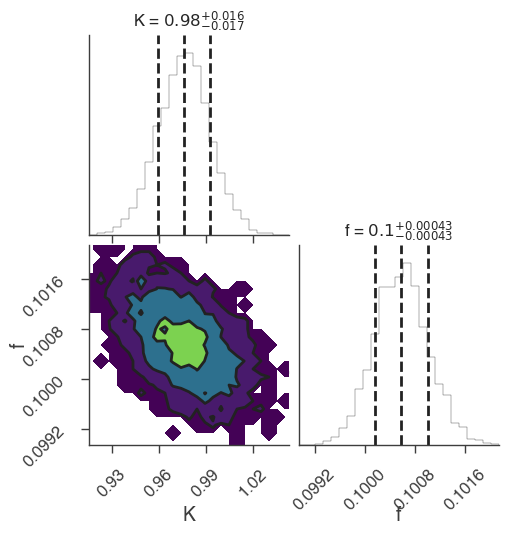

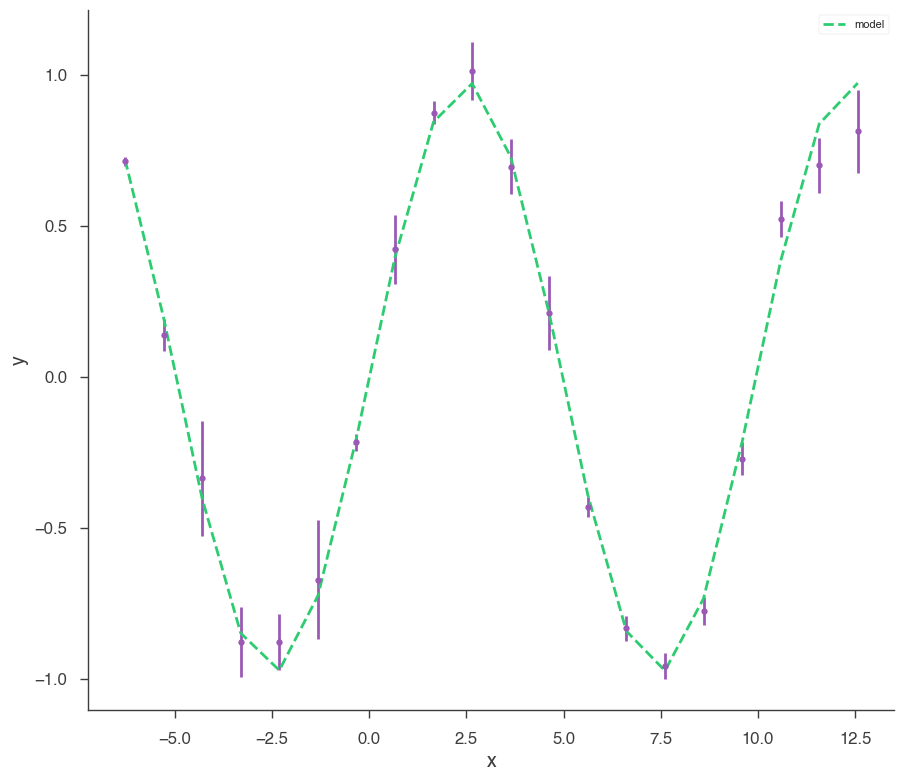

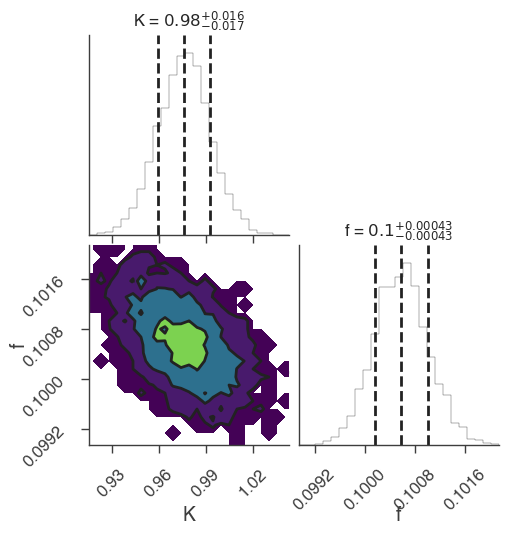

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

01:37:39 INFO      sampler set to zeus                                                     ]8;id=296775;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=808745;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:13, 46.12it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:11, 55.59it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:11, 55.15it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:10, 58.89it/s]

Sampling progress :   5%|▌         | 33/625 [00:00<00:09, 64.98it/s]

Sampling progress :   6%|▋         | 40/625 [00:00<00:09, 59.20it/s]

Sampling progress :   8%|▊         | 47/625 [00:00<00:10, 54.66it/s]

Sampling progress :   9%|▊         | 54/625 [00:00<00:10, 56.93it/s]

Sampling progress :  10%|▉         | 61/625 [00:01<00:09, 58.58it/s]

Sampling progress :  11%|█         | 67/625 [00:01<00:09, 58.32it/s]

Sampling progress :  12%|█▏        | 73/625 [00:01<00:09, 57.92it/s]

Sampling progress :  13%|█▎        | 80/625 [00:01<00:08, 60.76it/s]

Sampling progress :  14%|█▍        | 87/625 [00:01<00:08, 61.56it/s]

Sampling progress :  15%|█▌        | 94/625 [00:01<00:08, 61.08it/s]

Sampling progress :  16%|█▌        | 101/625 [00:01<00:08, 62.77it/s]

Sampling progress :  17%|█▋        | 108/625 [00:01<00:08, 61.48it/s]

Sampling progress :  18%|█▊        | 115/625 [00:01<00:08, 60.60it/s]

Sampling progress :  20%|█▉        | 122/625 [00:02<00:08, 56.16it/s]

Sampling progress :  20%|██        | 128/625 [00:02<00:08, 55.92it/s]

Sampling progress :  21%|██▏       | 134/625 [00:02<00:08, 54.89it/s]

Sampling progress :  22%|██▏       | 140/625 [00:02<00:08, 55.29it/s]

Sampling progress :  23%|██▎       | 146/625 [00:02<00:08, 55.44it/s]

Sampling progress :  25%|██▍       | 154/625 [00:02<00:07, 60.18it/s]

Sampling progress :  26%|██▌       | 161/625 [00:02<00:08, 56.03it/s]

Sampling progress :  27%|██▋       | 167/625 [00:02<00:08, 53.43it/s]

Sampling progress :  28%|██▊       | 173/625 [00:03<00:08, 51.35it/s]

Sampling progress :  29%|██▊       | 179/625 [00:03<00:08, 52.12it/s]

Sampling progress :  30%|██▉       | 186/625 [00:03<00:07, 56.46it/s]

Sampling progress :  31%|███       | 194/625 [00:03<00:07, 60.99it/s]

Sampling progress :  32%|███▏      | 202/625 [00:03<00:06, 63.19it/s]

Sampling progress :  33%|███▎      | 209/625 [00:03<00:06, 64.99it/s]

Sampling progress :  35%|███▍      | 216/625 [00:03<00:06, 65.78it/s]

Sampling progress :  36%|███▌      | 224/625 [00:03<00:05, 69.64it/s]

Sampling progress :  37%|███▋      | 232/625 [00:03<00:05, 70.68it/s]

Sampling progress :  38%|███▊      | 240/625 [00:04<00:05, 69.84it/s]

Sampling progress :  40%|███▉      | 248/625 [00:04<00:05, 67.46it/s]

Sampling progress :  41%|████      | 255/625 [00:04<00:05, 66.09it/s]

Sampling progress :  42%|████▏     | 262/625 [00:04<00:05, 66.13it/s]

Sampling progress :  43%|████▎     | 269/625 [00:04<00:05, 63.46it/s]

Sampling progress :  44%|████▍     | 276/625 [00:04<00:05, 63.10it/s]

Sampling progress :  45%|████▌     | 283/625 [00:04<00:05, 64.78it/s]

Sampling progress :  46%|████▋     | 290/625 [00:04<00:05, 65.32it/s]

Sampling progress :  48%|████▊     | 298/625 [00:04<00:04, 67.42it/s]

Sampling progress :  49%|████▉     | 305/625 [00:05<00:04, 66.52it/s]

Sampling progress :  50%|████▉     | 312/625 [00:05<00:04, 65.53it/s]

Sampling progress :  51%|█████     | 319/625 [00:05<00:04, 65.47it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:05<00:04, 64.98it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:05<00:04, 64.47it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:05<00:04, 63.68it/s]

Sampling progress :  56%|█████▌    | 348/625 [00:05<00:04, 66.67it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:05<00:04, 65.20it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:05<00:04, 65.66it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:06<00:04, 63.74it/s]

Sampling progress :  60%|██████    | 376/625 [00:06<00:03, 64.42it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:06<00:03, 63.49it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:06<00:03, 64.24it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:06<00:03, 67.60it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:06<00:03, 67.42it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:06<00:03, 68.99it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:06<00:02, 70.50it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:06<00:02, 66.63it/s]

Sampling progress :  70%|██████▉   | 436/625 [00:07<00:02, 65.59it/s]

Sampling progress :  71%|███████   | 443/625 [00:07<00:02, 63.88it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:07<00:02, 66.29it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:07<00:02, 67.92it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:07<00:02, 66.72it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:07<00:02, 62.54it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:07<00:02, 62.85it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:07<00:02, 63.66it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:07<00:01, 67.03it/s]

Sampling progress :  80%|████████  | 502/625 [00:08<00:01, 65.36it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:08<00:01, 65.28it/s]

Sampling progress :  83%|████████▎ | 516/625 [00:08<00:01, 64.13it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:08<00:01, 62.07it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:08<00:01, 62.61it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:08<00:01, 61.51it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:08<00:01, 62.28it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:08<00:01, 63.68it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:08<00:01, 62.63it/s]

Sampling progress :  90%|█████████ | 565/625 [00:09<00:00, 64.43it/s]

Sampling progress :  92%|█████████▏| 572/625 [00:09<00:00, 61.86it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:09<00:00, 60.04it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:09<00:00, 59.79it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:09<00:00, 61.46it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:09<00:00, 60.26it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:09<00:00, 59.44it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:09<00:00, 58.71it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:09<00:00, 61.67it/s]

Sampling progress : 100%|██████████| 625/625 [00:10<00:00, 62.25it/s]

01:37:49 INFO      fit restored to maximum of posterior                                         ]8;id=216163;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=219769;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=460232;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=163689;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 22


Scale Factor: 1.262646


Mean Integrated Autocorrelation Time: 2.7


Effective Sample Size: 4628.36


Number of Log Probability Evaluations: 64755


Effective Samples per Log Probability Evaluation: 0.071475


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.16 +0.17) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.161266
total,-8.161266


Values of statistical measures:

,statistical measures
AIC,21.028414
BIC,22.313996
DIC,20.372504
PDIC,2.024444


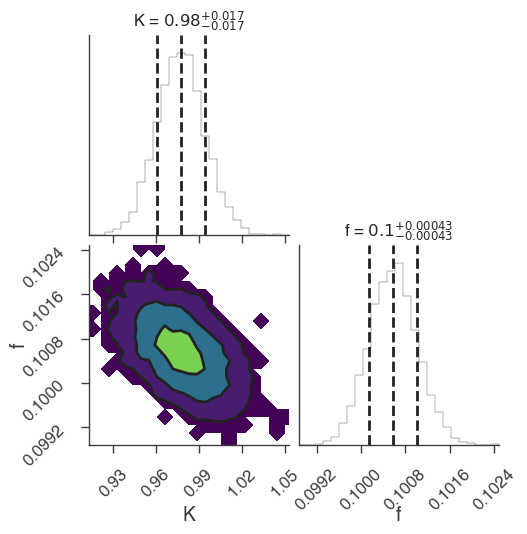

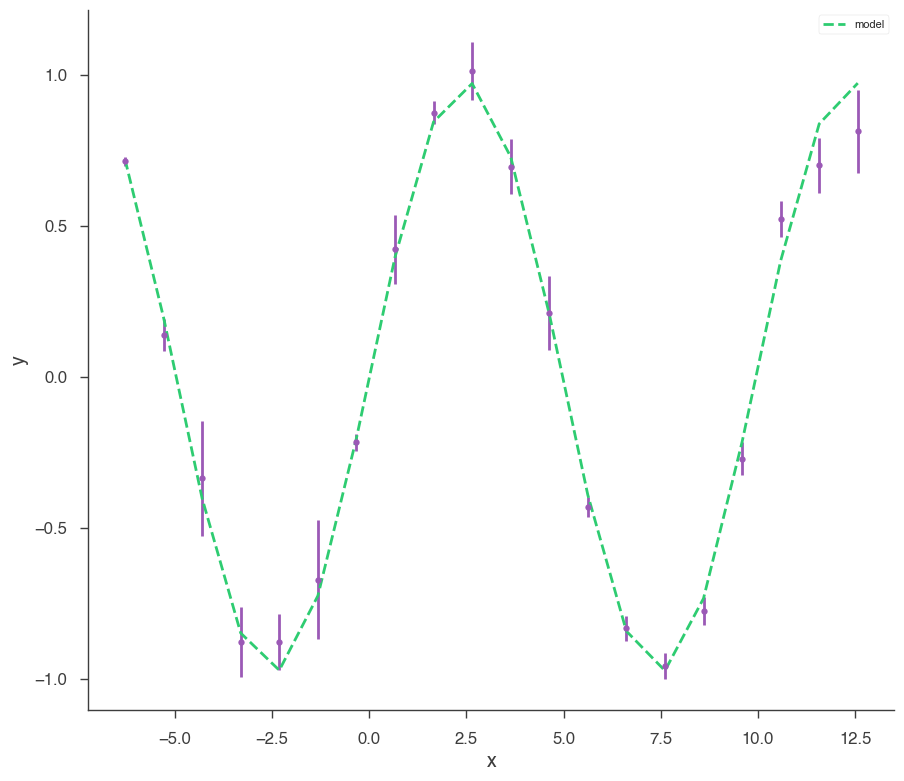

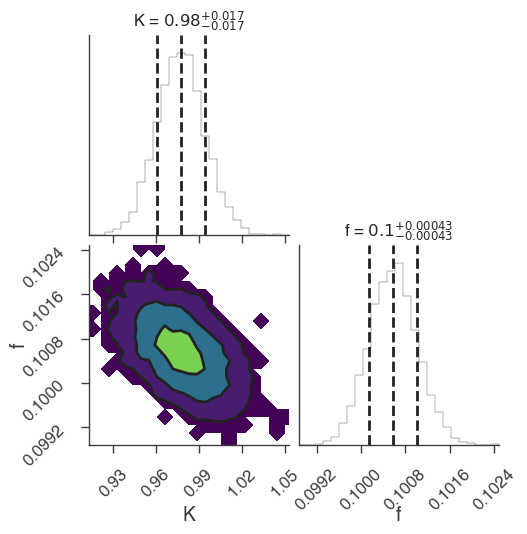

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

01:37:50 INFO      sampler set to ultranest                                                ]8;id=398037;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=159129;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 7533


[ultranest]   logZ = -17.95 +- 0.1499


[ultranest] Effective samples strategy satisfied (ESS = 980.6, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.15 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.


01:37:59 INFO      fit restored to maximum of posterior                                         ]8;id=946170;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=22247;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=550524;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=676814;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.76 +/- 0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.006 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.162017
total,-8.162017


Values of statistical measures:

,statistical measures
AIC,21.029915
BIC,22.315498
DIC,20.243770
PDIC,1.960058
log(Z),-7.790912


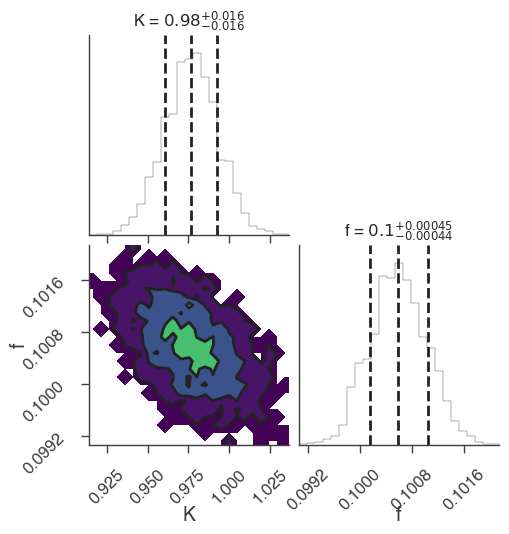

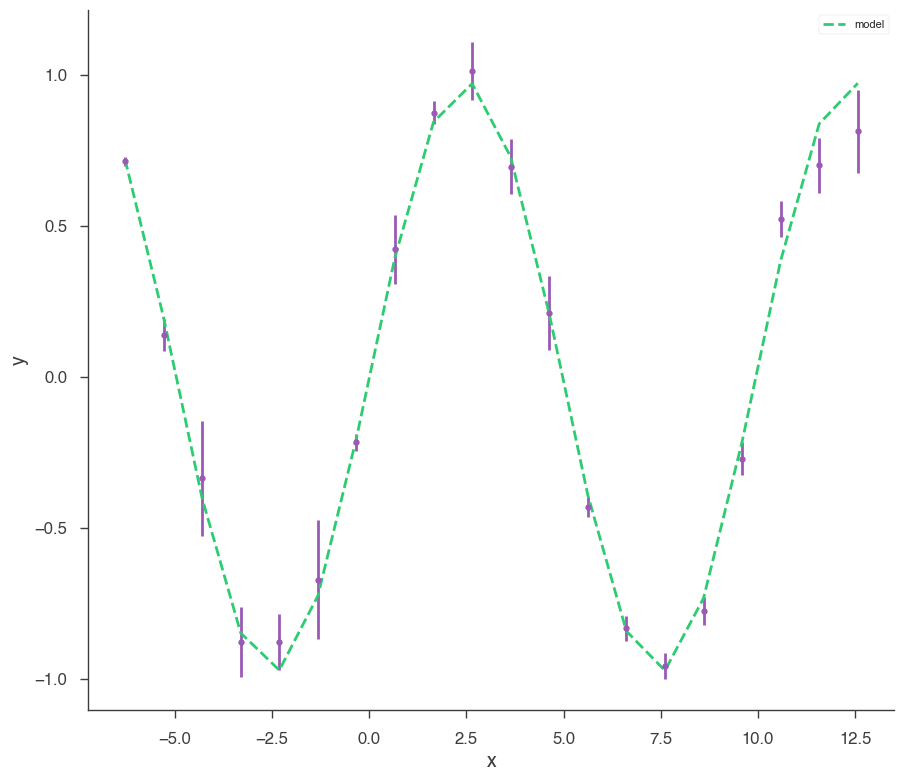

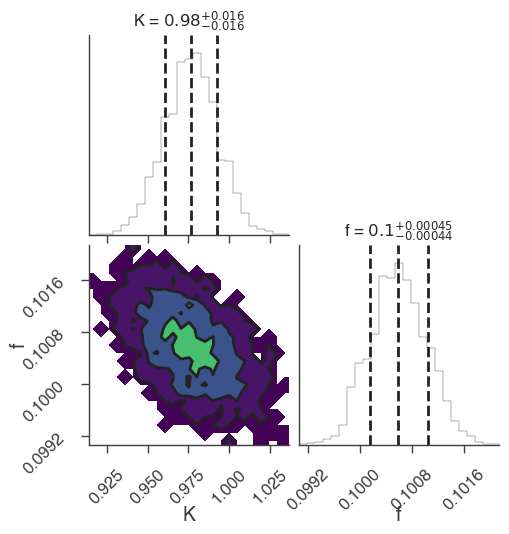

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()